<img src="images.png">

# DataTapas Project- Idan Hadromi


<div class="alert alert-block alert-info">
<b> Get Data   </b>
</div>
 

<font color='blue'>**Rating table**</font>

In [32]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

ratings = pd.read_csv('ratings.csv.zip',usecols=['userId', 'movieId', 'rating', 'timestamp'])

In [33]:
display(ratings.shape)
display(ratings.head())
print("")
display(ratings.info())

(26024289, 4)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


None


<font color='blue'>**Movies table**</font>

In [34]:
movies = pd.read_csv('movies_metadata.csv',usecols= ['id','title','genres'])

In [35]:
display(movies.shape)
display(movies.head())
print("")
display(movies.info())

(45466, 3)

,genres,id,title
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,Grumpier Old Men
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Waiting to Exhale
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Father of the Bride Part II



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  45466 non-null  object
 1   id      45466 non-null  object
 2   title   45460 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


None


<div class="alert alert-block alert-info">

<b> Sampling Data   </b>

</div>

 


<div class="alert alert-block alert-success">

<b>* Steps:</b> <br>

<b>* sampling rating table</b><br>
<b>* population statistic measures</b><br>
<b>* Evaluate sample equal to distribution using (Goodness of fit)</b><br>

</div>


<font color='blue'>**Sampling rating table**</font>

In [36]:
from sklearn.model_selection import train_test_split

# select 300K observations
train, test = train_test_split(ratings, test_size=0.0001, random_state=0)

ratings_samp = test.copy()

del train, test

In [37]:
display(ratings_samp.shape)
ratings_samp.head()

(2603, 4)

,userId,movieId,rating,timestamp
3577429,37260,37736,3.5,1485640873
20896001,217122,6333,3.5,1117557400
15587787,162287,315,2.0,1002920206
11147934,115461,1136,4.0,980899555
25857847,269035,6188,3.0,1112732726



<font color='blue'>**Population statistic measures**</font>

In [38]:
import numpy as np
print(f"""
**Population:**
           
statistic:
 average rating : {np.mean(ratings['rating'])}
 median rating  : {np.median(ratings['rating'])}
 std rating :  {np.std(ratings['rating'])}
      
frequency:
 total_movies : {len(np.unique(ratings['movieId']))}
 most rated movies:
 {((ratings['movieId'].value_counts()/len(ratings))*100).head(5)}
      """)


**Population:**
           
statistic:
 average rating : 3.5280903543608817
 median rating  : 3.5
 std rating :  1.0654427432942872
      
frequency:
 total_movies : 45115
 most rated movies:
 356     0.353212
318     0.349988
296     0.337765
593     0.323075
2571    0.299566
Name: movieId, dtype: float64
      



<font color='blue'>**Evaluate sample equal to distribution using (Goodness of fit)**</font>

**Estimate 'rating' column**

In [39]:
from scipy.stats import chisquare

pop_rate = (ratings.groupby(['rating']).size()/len(ratings)).reset_index().rename(columns={0:'%pop'})
sample_rate = (ratings_samp.groupby(['rating']).size()/len(ratings_samp)).reset_index().rename(columns={0:'%sample'})
rate_compare = pop_rate.merge(sample_rate,how='left',on='rating')
display(rate_compare)

,rating,%pop,%sample
0,0.5,0.015558,0.016519
1,1.0,0.032405,0.036112
2,1.5,0.015509,0.018056
3,2.0,0.067723,0.064925
4,2.5,0.048238,0.046869
5,3.0,0.201993,0.204380
6,3.5,0.119742,0.115252
7,4.0,0.268933,0.270841
8,4.5,0.083401,0.081060
9,5.0,0.146498,0.145985


In [40]:
p_value = chisquare(f_obs = rate_compare['%sample'], f_exp=rate_compare['%pop']).pvalue

print(f"""
       ***********************************************************************
        p_value {p_value} > 0.05
          
        conclusion:
        In confidence of 95% we can not reject null hypothesis.
        Meaning  sample of rating  distribution is representing rating population
               
       ***********************************************************************
       """)


       ***********************************************************************
        p_value 0.9999999999999999 > 0.05
          
        conclusion:
        In confidence of 95% we can not reject null hypothesis.
        Meaning  sample of rating  distribution is representing rating population
               
       ***********************************************************************
       


**Estimate 'movieId' column**

In [41]:
from scipy.stats import chisquare

pop_movieId = pd.DataFrame((ratings['movieId'].value_counts()/len(ratings)).reset_index()).rename(columns={'index':'movieId','movieId':'%pop'})
sample_movieId = pd.DataFrame((ratings_samp['movieId'].value_counts()/len(ratings_samp)).reset_index()).rename(columns={'index':'movieId','movieId':'%sample'})


movieId_compare = pop_movieId.merge(sample_movieId,how='left',on='movieId')
movieId_compare['%sample'] = movieId_compare['%sample'].fillna(0)
display(movieId_compare)

,movieId,%pop,%sample
0,356,3.532123e-03,0.003073
1,318,3.499884e-03,0.006147
2,296,3.377652e-03,0.005378
3,593,3.230751e-03,0.003458
4,2571,2.995663e-03,0.002689
...,...,...,...
45110,151011,3.842564e-08,0.000000
45111,176257,3.842564e-08,0.000000
45112,167416,3.842564e-08,0.000000
45113,134633,3.842564e-08,0.000000


In [42]:
p_value = chisquare(f_obs = movieId_compare['%sample'], f_exp=movieId_compare['%pop']).pvalue

print(f"""
       ***********************************************************************
        p_value {p_value} > 0.05
          
        conclusion:
        In confidence of 95% we can not reject null hypothesis.
        Meaning  sample of rating  distribution is representing rating population
               
       ***********************************************************************
       """)


       ***********************************************************************
        p_value 1.0 > 0.05
          
        conclusion:
        In confidence of 95% we can not reject null hypothesis.
        Meaning  sample of rating  distribution is representing rating population
               
       ***********************************************************************
       



<div class="alert alert-block alert-info">

<b> **create dataset**   </b>

</div>

 

In [43]:
ratings_samp['movieId'] = ratings_samp['movieId'].astype(str)
movies['id'] = movies['id'].astype(str)


df = ratings_samp.merge(movies,how='left',left_on='movieId',right_on='id')

In [44]:
display(df.shape)
df.head()

(2603, 7)

,userId,movieId,rating,timestamp,genres,id,title
0,37260,37736,3.5,1485640873,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",37736,Take Out
1,217122,6333,3.5,1117557400,NaN,NaN,NaN
2,162287,315,2.0,1002920206,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",315,"Faster, Pussycat! Kill! Kill!"
3,115461,1136,4.0,980899555,NaN,NaN,NaN
4,269035,6188,3.0,1112732726,NaN,NaN,NaN



<div class="alert alert-block alert-info">

<b> **Data Pre Process**   </b>

</div>




<font color='blue'>**Drop NA**</font>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 2602
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     2603 non-null   int64  
 1   movieId    2603 non-null   object 
 2   rating     2603 non-null   float64
 3   timestamp  2603 non-null   int64  
 4   genres     1186 non-null   object 
 5   id         1186 non-null   object 
 6   title      1186 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 162.7+ KB


In [46]:
df.dropna(axis=0, how='any',inplace=True)
df.shape

(1186, 7)

<font color='blue'>**Create table - population rating**</font>

In [47]:
population_rating = df.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating':'population_rating'})
population_rating.head()

,movieId,population_rating
0,101,4.000000
1,1023,4.000000
2,103688,2.000000
3,104,1.750000
4,105,3.666667



<font color='blue'>**Create table - popularity movies**</font>

In [48]:
popularity_movies = (df.groupby('movieId').size()/len(df)).reset_index().rename(columns={0:'popularity'})
popularity_movies.head()

,movieId,popularity
0,101,0.000843
1,1023,0.001686
2,103688,0.000843
3,104,0.003373
4,105,0.002530




<font color='blue'>**Create table Genres_confidence**</font>

* **Extract genres from  'genres'**

In [49]:
df.head(1)

,userId,movieId,rating,timestamp,genres,id,title
0,37260,37736,3.5,1485640873,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",37736,Take Out


In [50]:
df['genres'].head()[2]

"[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}]"

In [51]:
df['genres'].head()[2]

a = df['genres'].head()[2]#split("}")


import re
p=re.compile(("name\\W+(\\w+)"))
xx =p.findall(a)

In [52]:
xx

['Action', 'Crime']

In [53]:
# Python program to convert a list to string 
    
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele +" "   
    
    str1.strip().split()
    
    # return string   
    return str1  

In [54]:
df.head()

,userId,movieId,rating,timestamp,genres,id,title
0,37260,37736,3.5,1485640873,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",37736,Take Out
2,162287,315,2.0,1002920206,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",315,"Faster, Pussycat! Kill! Kill!"
9,170726,1957,3.0,1183509272,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1957,Enough
12,247770,535,4.5,1053917442,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",535,Flashdance
13,161794,2028,4.0,940219934,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2028,Say Anything...


In [55]:
xx=df[['movieId','genres']]

In [56]:
xx.head()

,movieId,genres
0,37736,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n..."
2,315,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
9,1957,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
12,535,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
13,2028,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


In [57]:
import re
p=re.compile(("name\\W+(\\w+)"))
xx['genres'] =xx['genres'].apply(lambda x: p.findall(x))

In [58]:
xx.tail()

,movieId,genres
2595,4226,[Comedy]
2596,780,"[Drama, History]"
2598,2990,"[Crime, Thriller]"
2601,832,"[Drama, Action, Thriller, Crime]"
2602,319,"[Action, Thriller, Crime, Romance]"


In [59]:
xx['genres']= xx['genres'].apply(lambda x: listToString(x))

In [60]:
xx.head()

,movieId,genres
0,37736,Drama Foreign
2,315,Action Crime
9,1957,Drama Thriller
12,535,Drama Music Romance
13,2028,Comedy Drama Romance


In [61]:
xx = pd.concat([xx['movieId'],xx["genres"].str.split(" ", expand = True)],axis=1)

In [62]:
xx= xx.stack().reset_index()

In [63]:
xx.head()

,level_0,level_1,0
0,0,movieId,37736
1,0,0,Drama
2,0,1,Foreign
3,0,2,
4,2,movieId,315


In [64]:
xx= xx.rename(columns={'level_1':'movieId',0:'genres'}).drop(columns= 'level_0')
xx.head()

,movieId,genres
0,movieId,37736
1,0,Drama
2,1,Foreign
3,2,
4,movieId,315


In [65]:
xx['movieId'] = xx['movieId'].apply(lambda x: None  if x!='movieId' else x)

In [66]:
xx.head()

,movieId,genres
0,movieId,37736
1,None,Drama
2,None,Foreign
3,None,
4,movieId,315


In [67]:
xx['movieId'] = np.where(xx['movieId']=='movieId',xx['genres'],xx['movieId'])

In [68]:
xx.head()

,movieId,genres
0,37736,37736
1,None,Drama
2,None,Foreign
3,None,
4,315,315


In [69]:
xx['movieId'].ffill(axis = 0 ,inplace=True) 

In [70]:
xx.head()

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
3,37736,
4,315,315


In [71]:
xx.dropna(how='any',inplace=True)

In [72]:
xx.head()

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
3,37736,
4,315,315


In [73]:
xx['genres'][3]

''

In [74]:
xx.replace('""', np.nan,inplace=True)

In [75]:
xx.head()

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
3,37736,
4,315,315


In [76]:
xx['genres'][3]

''

In [77]:
xx

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
3,37736,
4,315,315
...,...,...
5231,319,Action
5232,319,Thriller
5233,319,Crime
5234,319,Romance


In [78]:
replace = xx['genres'][3]
xx.replace(to_replace= replace,value=None,inplace=True)

movieId    None
genres     None
dtype: object

In [79]:
xx.head(10)

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
3,37736,Foreign
4,315,315
5,315,Action
6,315,Crime
7,315,Crime
8,1957,1957
9,1957,Drama


In [80]:
xx.drop_duplicates(inplace=True)

In [81]:
xx.head()

,movieId,genres
0,37736,37736
1,37736,Drama
2,37736,Foreign
4,315,315
5,315,Action


In [82]:
xx['flag'] = np.where(xx['movieId']==xx['genres'],1,0)

In [83]:
xx.head()

,movieId,genres,flag
0,37736,37736,1
1,37736,Drama,0
2,37736,Foreign,0
4,315,315,1
5,315,Action,0


In [84]:
xx = xx.loc[xx['flag'] ==0,['movieId','genres']]

In [85]:
xx.head()

,movieId,genres
1,37736,Drama
2,37736,Foreign
5,315,Action
6,315,Crime
9,1957,Drama


In [86]:
genres_freq= (xx.groupby(['genres']).size()/len(xx)).sort_values(ascending=False).reset_index().rename(columns={0:'%Freq'})
genres_freq

,genres,%Freq
0,Drama,0.231305
1,Comedy,0.117237
2,Thriller,0.102662
3,Action,0.080482
4,Romance,0.080482
5,Crime,0.067174
6,Adventure,0.060203
7,Science,0.051965
8,Mystery,0.036755
9,Horror,0.034854


In [87]:
xx.head()

,movieId,genres
1,37736,Drama
2,37736,Foreign
5,315,Action
6,315,Crime
9,1957,Drama


In [88]:
xx = xx.merge(genres_freq,how='left',on='genres')
xx['flag']= 1
xx.head()

,movieId,genres,%Freq,flag
0,37736,Drama,0.231305,1
1,37736,Foreign,0.006971,1
2,315,Action,0.080482,1
3,315,Crime,0.067174,1
4,1957,Drama,0.231305,1


In [89]:
#movieId_genres
movieIdGenres_freq= xx.groupby('movieId')['%Freq'].sum().reset_index()
movieIdGenres_freq.head()

,movieId,%Freq
0,101,0.401141
1,1023,0.415716
2,103688,0.257288
3,104,0.414449
4,105,0.252852


In [90]:
genres_confidence = xx.groupby('movieId')['%Freq'].sum().reset_index().rename(columns={'%Freq':'genres_confidence'})
genres_confidence.head()

,movieId,genres_confidence
0,101,0.401141
1,1023,0.415716
2,103688,0.257288
3,104,0.414449
4,105,0.252852



<font color='blue'>**Create table movieId Genres categories**</font>

In [91]:
movieId_Genres_categories = pd.pivot_table(xx, values='flag', index=['movieId'],columns=['genres'], aggfunc=np.sum).reset_index()
movieId_Genres_categories.head()

genres,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,101,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,1023,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103688,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,105,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [92]:
movieId_Genres_categories.fillna(0,inplace=True)

In [93]:
movieId_Genres_categories.head()

genres,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,101,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1023,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103688,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,104,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,105,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [94]:
movieId_Genres_categories.iloc[:,1:] = movieId_Genres_categories.iloc[:,1:].astype('int')
movieId_Genres_categories.head()

genres,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,101,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1023,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,103688,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,104,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,105,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0




<font color='blue'>**Merge Tables**</font>

 * **population_rating**
 * **popularity_movies**
 * **genres_confidence**
 * **movieId_Genres_categories**
 * **df - contain each rating per userId**

In [95]:
print('\npopulation_rating')
display(population_rating.head())
print("")
print('popularity_movies')
display(popularity_movies.head(3))
print("")
print('genres_confidence')
display(genres_confidence.head(3))
print("")
print('movieId_Genres_categories')
display(movieId_Genres_categories.head(3))
print("")
print('df - contain each rating per userId')
display(df.head(3))


population_rating


,movieId,population_rating
0,101,4.000000
1,1023,4.000000
2,103688,2.000000
3,104,1.750000
4,105,3.666667



popularity_movies


,movieId,popularity
0,101,0.000843
1,1023,0.001686
2,103688,0.000843



genres_confidence


,movieId,genres_confidence
0,101,0.401141
1,1023,0.415716
2,103688,0.257288



movieId_Genres_categories


genres,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,101,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1023,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,103688,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0



df - contain each rating per userId


,userId,movieId,rating,timestamp,genres,id,title
0,37260,37736,3.5,1485640873,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",37736,Take Out
2,162287,315,2.0,1002920206,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",315,"Faster, Pussycat! Kill! Kill!"
9,170726,1957,3.0,1183509272,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",1957,Enough





<font color='blue'>**Edit Dataset**</font>

In [96]:
df.head(2)

,userId,movieId,rating,timestamp,genres,id,title
0,37260,37736,3.5,1485640873,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",37736,Take Out
2,162287,315,2.0,1002920206,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",315,"Faster, Pussycat! Kill! Kill!"


* **Remove unrelevant column**

In [97]:
df = df.drop(columns=['genres','id'])
df.head(2)

,userId,movieId,rating,timestamp,title
0,37260,37736,3.5,1485640873,Take Out
2,162287,315,2.0,1002920206,"Faster, Pussycat! Kill! Kill!"


In [98]:
df = df.merge(population_rating,how='left',on='movieId')
df = df.merge(popularity_movies,how='left',on='movieId')
df = df.merge(genres_confidence,how='left',on='movieId')
df = df.merge(movieId_Genres_categories,how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,population_rating,popularity,genres_confidence,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,37260,37736,3.5,1485640873,Take Out,3.500000,0.000843,0.238276,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,162287,315,2.0,1002920206,"Faster, Pussycat! Kill! Kill!",2.000000,0.000843,0.147655,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,170726,1957,3.0,1183509272,Enough,3.000000,0.000843,0.333967,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,247770,535,4.5,1053917442,Flashdance,4.500000,0.002530,0.325095,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,161794,2028,4.0,940219934,Say Anything...,4.285714,0.005902,0.429024,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1185
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userId             1186 non-null   int64  
 1   movieId            1186 non-null   object 
 2   rating             1186 non-null   float64
 3   timestamp          1186 non-null   int64  
 4   title              1186 non-null   object 
 5   population_rating  1186 non-null   float64
 6   popularity         1186 non-null   float64
 7   genres_confidence  1185 non-null   float64
 8   Action             1185 non-null   float64
 9   Adventure          1185 non-null   float64
 10  Animation          1185 non-null   float64
 11  Comedy             1185 non-null   float64
 12  Crime              1185 non-null   float64
 13  Documentary        1185 non-null   float64
 14  Drama              1185 non-null   float64
 15  Family             1185 non-null   float64
 16  Fantasy            1185 





<font color='blue'>**My raw Dataset**</font>

In [100]:
df.dropna(inplace=True)

In [101]:
df.iloc[:,8:]=df.iloc[:,8:].astype('int')
df.head()

,userId,movieId,rating,timestamp,title,population_rating,popularity,genres_confidence,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,37260,37736,3.5,1485640873,Take Out,3.500000,0.000843,0.238276,0,0,...,0,0,0,0,0,0,0,0,0,0
1,162287,315,2.0,1002920206,"Faster, Pussycat! Kill! Kill!",2.000000,0.000843,0.147655,1,0,...,0,0,0,0,0,0,0,0,0,0
2,170726,1957,3.0,1183509272,Enough,3.000000,0.000843,0.333967,0,0,...,0,0,0,0,0,0,0,1,0,0
3,247770,535,4.5,1053917442,Flashdance,4.500000,0.002530,0.325095,0,0,...,0,0,1,0,1,0,0,0,0,0
4,161794,2028,4.0,940219934,Say Anything...,4.285714,0.005902,0.429024,0,0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
# edit table
df = df[['timestamp','userId','movieId','title','rating','population_rating','popularity','genres_confidence'
        ,'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family'
        ,'Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science'
        ,'TV','Thriller','War','Western']]

In [103]:
df.head(2)

,timestamp,userId,movieId,title,rating,population_rating,popularity,genres_confidence,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,1485640873,37260,37736,Take Out,3.5,3.5,0.000843,0.238276,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002920206,162287,315,"Faster, Pussycat! Kill! Kill!",2.0,2.0,0.000843,0.147655,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df= df.rename(columns={'rating':'user_rating'})

In [105]:
df = df.rename(columns={'rating':'user_rating','popularity':'%total_votes','genres_confidence': '%total_genres'})

In [106]:
df.head()

,timestamp,userId,movieId,title,user_rating,population_rating,%total_votes,%total_genres,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,1485640873,37260,37736,Take Out,3.5,3.500000,0.000843,0.238276,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002920206,162287,315,"Faster, Pussycat! Kill! Kill!",2.0,2.000000,0.000843,0.147655,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1183509272,170726,1957,Enough,3.0,3.000000,0.000843,0.333967,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1053917442,247770,535,Flashdance,4.5,4.500000,0.002530,0.325095,0,0,...,0,0,1,0,1,0,0,0,0,0
4,940219934,161794,2028,Say Anything...,4.0,4.285714,0.005902,0.429024,0,0,...,0,0,0,0,1,0,0,0,0,0


 * **Raw dataset decription:** 
 
     * rows : 
        * Each row contain rating per movie by userId.
        * Each row contain genres per movie 
     * columns:
        * **timestamp** - int, when the movie rated by user
        * **userId** - int , contain duplicates.
        * **movieId** -int , contain duplicates.
        * **title** - str, movie name, contain duplicates.
        * **user_rating** - float, show rank min -0, max -5 
        * **population_rating** - float, show rank min -0, max -5 
        * **%total_votes** - float, movie popularity min-0 max -1
        * **%total_genres** - float, total categories related to movie min:0 , max:1.
        * **Action: Western** : binary,  genres


<div class="alert alert-block alert-info">
<b> Questions 1 : create a list of the top 10 movies   </b>
</div>
 

<div class="alert alert-block alert-success">

<b>
My Metric: <br>

A. inputs: <br>
   1. population_rating (5-best,1-worst) <br>
   2. %total_votes - weight of rank per movie from all ratings <br>
   3. %total_genres - how many genres per each movie. more genres can estimate this movie isn't niche and will be  <br>
      acceptable by most of users. <br>
 
B. scale : each feature 0-100. (100-best,0-worst) <br>
C. total_score will be the average of the 3 features (target) <br>

</b>


* Example:
  
  * I've 3 movies as follow table:
  * the order will be (1-most popular ,3-less popular)

| movieID | %total_votes | population_rating | %total_genres | score |
| --- | --- | --- |--- | ---|
| 1 | 80% | 5 | 50% | 100 |
| 2 | 15% | 3 | 30% | 70 | 
| 3 | 5% | 1 | 20%|   60  |



<font color='blue'>**My raw table**</font>

In [107]:
df.head()

,timestamp,userId,movieId,title,user_rating,population_rating,%total_votes,%total_genres,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,1485640873,37260,37736,Take Out,3.5,3.500000,0.000843,0.238276,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002920206,162287,315,"Faster, Pussycat! Kill! Kill!",2.0,2.000000,0.000843,0.147655,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1183509272,170726,1957,Enough,3.0,3.000000,0.000843,0.333967,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1053917442,247770,535,Flashdance,4.5,4.500000,0.002530,0.325095,0,0,...,0,0,1,0,1,0,0,0,0,0
4,940219934,161794,2028,Say Anything...,4.0,4.285714,0.005902,0.429024,0,0,...,0,0,0,0,1,0,0,0,0,0


 * Raw dataset decription: 
 
     * rows : 
        * Each row contain rating per movie by userId.
        * Each row contain genres per movie 
     * columns:
        * **timestamp** - int, when the movie rated by user
        * **userId** - int , contain duplicates.
        * **movieId** -int , contain duplicates.
        * **title** - str, movie name, contain duplicates.
        * **user_rating** - float, show rank min -0, max -5 
        * **population_rating** - float, show rank min -0, max -5 
        * **%total_votes** - float, movie popularity min-0 max -1
        * **%total_genres** - float, total categories related to movie min:0 , max:1.
        * **Action: Western** : binary,  genres



<font color='blue'>**Create relevant table**</font>

In [109]:
table = df[['movieId','title','population_rating','%total_votes','%total_genres']]
table = table.drop_duplicates()
display(table.shape)
table.head()

(649, 5)

,movieId,title,population_rating,%total_votes,%total_genres
0,37736,Take Out,3.500000,0.000843,0.238276
1,315,"Faster, Pussycat! Kill! Kill!",2.000000,0.000843,0.147655
2,1957,Enough,3.000000,0.000843,0.333967
3,535,Flashdance,4.500000,0.002530,0.325095
4,2028,Say Anything...,4.285714,0.005902,0.429024


In [110]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 1185
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            649 non-null    object 
 1   title              649 non-null    object 
 2   population_rating  649 non-null    float64
 3   %total_votes       649 non-null    float64
 4   %total_genres      649 non-null    float64
dtypes: float64(3), object(2)
memory usage: 30.4+ KB






<font color='blue'>**scaling features  (100 - the best, 0- the worst)**</font>

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

table['population_rating_score']= table['population_rating']
table['genres_score']= table['%total_genres']
table['population_votes']= table['%total_votes']
ct = ColumnTransformer(
                         [('passthrough', 'passthrough', ['movieId','title','population_rating','%total_votes','%total_genres'])
                          ,("MinMaxScaler",MinMaxScaler(feature_range=(0, 100)), ['population_rating_score','genres_score','population_votes'])])


headers = table.columns.tolist()
table=ct.fit_transform(table)
table = pd.DataFrame(table,columns= headers)
table = table[['movieId','title','population_rating_score','population_votes','genres_score']]
table.head()

,movieId,title,population_rating_score,population_votes,genres_score
0,37736,Take Out,66.6667,0,39.0792
1,315,"Faster, Pussycat! Kill! Kill!",33.3333,0,23.7687
2,1957,Enough,55.5556,0,55.2463
3,535,Flashdance,88.8889,13.3333,53.7473
4,2028,Say Anything...,84.127,40,71.3062


In [112]:
def object_to_float (column):
    return column.astype('float')

ls = ['population_rating_score','population_votes','genres_score']

for i in ls:
    table[i] = object_to_float(table[i])    

In [113]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population_rating_score,649.0,65.234701,21.877257,0.0,55.555556,66.666667,77.777778,100.0
population_votes,649.0,5.505907,10.181229,0.0,0.000000,0.000000,6.666667,100.0
genres_score,649.0,42.647229,19.687756,0.0,29.764454,41.113490,57.708779,100.0



<font color='blue'>**create total score**</font>

In [114]:
table['total_score'] = (table['population_rating_score'] + table['population_votes'] + table['genres_score'])/3
table.head()

,movieId,title,population_rating_score,population_votes,genres_score,total_score
0,37736,Take Out,66.666667,0.000000,39.079229,35.248632
1,315,"Faster, Pussycat! Kill! Kill!",33.333333,0.000000,23.768737,19.034023
2,1957,Enough,55.555556,0.000000,55.246253,36.933936
3,535,Flashdance,88.888889,13.333333,53.747323,51.989849
4,2028,Say Anything...,84.126984,40.000000,71.306210,65.144398




<font color='blue'>**Top 10 Leaders**</font>

In [116]:
table = table.sort_values(by='total_score',ascending=False).reset_index(drop=True)
table.head(10)

,movieId,title,population_rating_score,population_votes,genres_score,total_score
0,318,The Million Dollar Hotel,88.888889,100.000000,55.246253,81.378381
1,296,Terminator 3: Rise of the Machines,84.126984,86.666667,38.543897,69.779183
2,858,Sleepless in Seattle,87.500000,46.666667,71.306210,68.490959
3,593,Solaris,87.654321,53.333333,63.062099,68.016584
4,111,Scarface,100.000000,20.000000,80.192719,66.730906
5,2028,Say Anything...,84.126984,40.000000,71.306210,65.144398
6,150,48 Hrs.,81.481481,13.333333,100.000000,64.938272
7,381,To Catch a Thief,100.000000,0.000000,86.402570,62.134190
8,507,Killing Zoe,94.444444,6.666667,80.192719,60.434610
9,1213,The Talented Mr. Ripley,94.444444,20.000000,66.595289,60.346578


<div class="alert alert-block alert-info">
<b> Questions 2: Create model to predict total score and Evaluate results   </b>
</div>



<font color='blue'>**My raw table**</font>

In [117]:
display(table.shape)
table.head()

(649, 6)

,movieId,title,population_rating_score,population_votes,genres_score,total_score
0,318,The Million Dollar Hotel,88.888889,100.000000,55.246253,81.378381
1,296,Terminator 3: Rise of the Machines,84.126984,86.666667,38.543897,69.779183
2,858,Sleepless in Seattle,87.500000,46.666667,71.306210,68.490959
3,593,Solaris,87.654321,53.333333,63.062099,68.016584
4,111,Scarface,100.000000,20.000000,80.192719,66.730906


In [118]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movieId                  649 non-null    object 
 1   title                    649 non-null    object 
 2   population_rating_score  649 non-null    float64
 3   population_votes         649 non-null    float64
 4   genres_score             649 non-null    float64
 5   total_score              649 non-null    float64
dtypes: float64(4), object(2)
memory usage: 30.5+ KB






<font color='blue'>**Split to train test**</font>

In [119]:
table['movieId'] = table['movieId'].astype('int')

In [120]:
from sklearn.model_selection import train_test_split
X = table.drop(columns=['title','total_score'])
y = table['total_score']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)



<font color='blue'>**Choose Estimator = XGboost**</font>

In [122]:
# ! pip install xgboost
import xgboost
regressor= xgboost.XGBRegressor(n_estimators=150, max_depth = 5)
regressor.fit(X_train, y_train, eval_set=([(X_train, y_train),( X_test, y_test)]),verbose=False);





<font color='blue'>**Underfit-Overfit Test**</font>

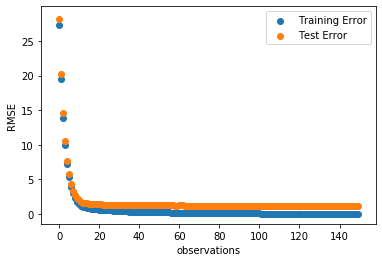

In [123]:
import matplotlib.pyplot as plt

eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

plt.scatter(x= training_rounds, y= eval_result['validation_0']['rmse'],label='Training Error' );
plt.scatter(x= training_rounds, y= eval_result['validation_1']['rmse'],label='Test Error' );
plt.ylabel('RMSE')
plt.xlabel('observations')
plt.legend();

<div class="alert alert-block alert-success">

<b>
We can see model learn pretty well, almost converge. <br> 
    
However, there is place to <br>
improve model by feature engineering and tuning hyperparameter for reach overlap converge<br>

I don't intend to get into it in this case study<br>
    
</b> 

</div>



<font color='blue'>**Evaluate model - by RMSLE 10 Fold Cross validation**</font>

In [124]:
import numpy as np
def my_custom_loss_func(y_true, y_pred):
        squared_logarithmic_errors = [np.power((np.log1p(y_pred[i]) - np.log1p(y[i])),2) for i,pred in enumerate(y_pred)]
        mean_squared_logarithmic_errors =np.mean(squared_logarithmic_errors)
        rmsle =np.sqrt(mean_squared_logarithmic_errors)
        return rmsle 

In [125]:
import xgboost
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

regressor= xgboost.XGBRegressor(n_estimators=150, max_depth = 5)
rmsle = make_scorer(my_custom_loss_func, greater_is_better=False)
results = cross_val_score(estimator=regressor, X=X,y= y,scoring= rmsle, cv=10,verbose=0)

In [126]:
print (
f"""
RMSLE results:

RMSLE {np.mean(-results)}

cross validatoin results: 
{-results}
""")


RMSLE results:

RMSLE 0.41942504982573625

cross validatoin results: 
[0.12292836 0.16138268 0.23342597 0.29964683 0.35218366 0.43004242
 0.47503709 0.58221437 0.71532504 0.82206408]



<div class="alert alert-block alert-success">
<b>
We can see error rate of average 0.41% in average. <br>
average error variance :<br>
low min=0.12% <br>
max= 0.82% <br>

</b>






<font color='blue'>**Test Residuals distribution**</font>

* **Fit model**

In [127]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

* **Predict**

In [128]:
y_pred = regressor.predict(X_test)

* **Collect prediction results**

In [129]:
results = pd.DataFrame(zip(y_test,regressor.predict(X_test)),columns=['y_test','y_pred'])
display(results.shape)
results.head()

(195, 2)

,y_test,y_pred
0,16.385122,17.446787
1,42.287255,42.122322
2,23.649774,24.470827
3,33.963835,35.640923
4,49.750178,50.866375


* **Calculate residuals**

In [130]:
results['residuals'] = results['y_test']-results['y_pred']

* **plot residuals**

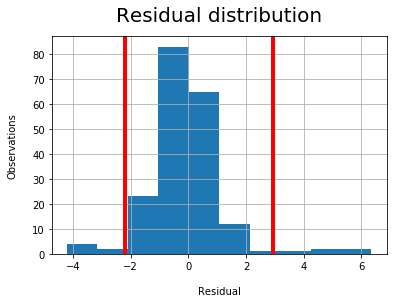

In [131]:
ax= results['residuals'].hist();
ax.axvline(np.quantile(results['residuals'],0.025),linewidth=4, color='r');
ax.axvline(np.quantile(results['residuals'],0.975),linewidth=4, color='r');
ax.set_title('Residual distribution',size=20,pad=15);
ax.set_ylabel('Observations',labelpad=15);
ax.set_xlabel('Residual',labelpad=15);

<div class="alert alert-block alert-success">
<b>
* Red line boundries show 95% from popultion <br>
* 95% from errors are between (-2) - (+3) points <br>
* 5% from (-4) - (+6.5) <br>
* score scale 0-100

summary: or results pretty well we can getting forward
<br>

</b>


* **Analyse residuals**

In [132]:
#under_estimation, test how many  y_pred prediction are below y_test predictions
under_estimation = len(results.loc[results['residuals']>0,'residuals'])/len(results['residuals'])
under_estimation

0.4358974358974359

In [133]:
#over_estimation, test how many  y_pred prediction are above y_test predictions
over_estimation = len(results.loc[results['residuals']<0,'residuals'])/len(results['residuals'])
over_estimation

0.5641025641025641

In [134]:
print(
f'''
under_estimation = {under_estimation}
over_estimation= {over_estimation}

Our redisuals are not balance and show high variance.

''')


under_estimation = 0.4358974358974359
over_estimation= 0.5641025641025641

Our redisuals are not balance and show high variance.




<div class="alert alert-block alert-success">
<b>

summary: <br>

model show pretty well results.
Error will be in range of (-2)+(+3) points in 95% confidence. <br>
Model is good to go.

We can getting forward 
<br>

</b>


* **plot prediction**

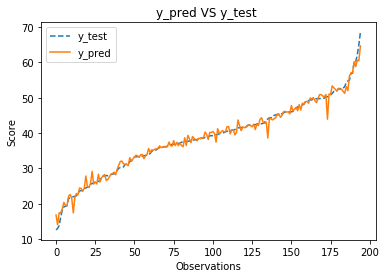

In [135]:
title='y_pred VS y_test '
ylabel='Score'
xlabel='Observations'


results.sort_values(by='y_test').reset_index()['y_test'].plot(ls='--');
results.sort_values(by='y_test').reset_index()['y_pred'].plot();
plt.legend()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

<font color='blue'>**Prediction - Top 10 movies**</font>

In [136]:
score_predict = pd.DataFrame(regressor.predict(X),columns=['score_predict'])
table = pd.concat([table,score_predict],axis=1)
table.head(10)

,movieId,title,population_rating_score,population_votes,genres_score,total_score,score_predict
0,318,The Million Dollar Hotel,88.888889,100.000000,55.246253,81.378381,81.381943
1,296,Terminator 3: Rise of the Machines,84.126984,86.666667,38.543897,69.779183,69.784340
2,858,Sleepless in Seattle,87.500000,46.666667,71.306210,68.490959,64.616188
3,593,Solaris,87.654321,53.333333,63.062099,68.016584,68.032837
4,111,Scarface,100.000000,20.000000,80.192719,66.730906,66.733833
5,2028,Say Anything...,84.126984,40.000000,71.306210,65.144398,65.119392
6,150,48 Hrs.,81.481481,13.333333,100.000000,64.938272,60.437263
7,381,To Catch a Thief,100.000000,0.000000,86.402570,62.134190,60.590488
8,507,Killing Zoe,94.444444,6.666667,80.192719,60.434610,60.428310
9,1213,The Talented Mr. Ripley,94.444444,20.000000,66.595289,60.346578,60.331291


<div class="alert alert-block alert-info">
<b> Questions 3: Recommender systems   </b>
</div>

**section A**: recommender system <u>without genres column</u>

Due to time constraints I preferred to focus Section B more complex than section A

**section B**: recommender system <u>contain genres column</u>

<div class="alert alert-block alert-success">
<b>
simple approach - Kmeans cluser ( without consider timestamp, due to time constraints)
    
Data Architecture:

create the follow tables:
1. create table name 'userId_preferences' - summarize userId preference per each genre by ferquency count method (key: userId)
2. create table 'movies_per_group' - summarize all movies per group order top to bottom
3  create table 'userId_group' - show relevant group per each userId 
4. create table 'movies_already_watched' - summarize all movies already have seen by each userId 
5. create table 'recommender_table' - based on:
   * userId group movies
   * filter per each user movies already have seen 
</b>

<font color='blue'>**My Raw Table**</font>

In [139]:
table['movieId'] = table['movieId'].astype('int').astype('str')
df['movieId'] = df['movieId'].astype('int').astype('str')

In [140]:
df = df.merge(table,how='left',on='movieId')

columns =['timestamp','userId','title_x'
          ,'user_rating','population_rating'
          ,'%total_votes','%total_genres','total_score'
         ,'Action','Adventure', 'Animation', 'Comedy'
          , 'Crime', 'Documentary', 'Drama'
          ,'Family', 'Fantasy', 'Foreign'
          , 'History', 'Horror', 'Music'
          ,'Mystery' ,'Romance', 'Science'
          , 'TV', 'Thriller', 'War', 'Western']

df = df[columns]
df = df.rename(columns={'title_x':'title'})
df.head()

,timestamp,userId,title,user_rating,population_rating,%total_votes,%total_genres,total_score,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,1485640873,37260,Take Out,3.5,3.500000,0.000843,0.238276,35.248632,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002920206,162287,"Faster, Pussycat! Kill! Kill!",2.0,2.000000,0.000843,0.147655,19.034023,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1183509272,170726,Enough,3.0,3.000000,0.000843,0.333967,36.933936,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1053917442,247770,Flashdance,4.5,4.500000,0.002530,0.325095,51.989849,0,0,...,0,0,1,0,1,0,0,0,0,0
4,940219934,161794,Say Anything...,4.0,4.285714,0.005902,0.429024,65.144398,0,0,...,0,0,0,0,1,0,0,0,0,0



<font color='blue'>**1. create table name 'userId_preferences'**</font>

In [141]:
userId_preferences = df.groupby('userId').sum().reset_index()
userId_preferences = userId_preferences.loc[:,~ userId_preferences.columns.isin(['timestamp', 'user_rating','population_rating','%total_votes','%total_genres','total_score'])]
userId_preferences.head()

,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,681,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,738,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1203,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1284,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1313,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
userId_preferences.describe().transpose()['Action':]

,count,mean,std,min,25%,50%,75%,max
Action,1176.0,0.200680,0.400680,0.0,0.0,0.0,0.0,1.0
Adventure,1176.0,0.142857,0.352499,0.0,0.0,0.0,0.0,2.0
Animation,1176.0,0.011905,0.108504,0.0,0.0,0.0,0.0,1.0
Comedy,1176.0,0.277211,0.449708,0.0,0.0,0.0,1.0,2.0
Crime,1176.0,0.169218,0.377366,0.0,0.0,0.0,0.0,2.0
Documentary,1176.0,0.031463,0.174639,0.0,0.0,0.0,0.0,1.0
Drama,1176.0,0.567177,0.499100,0.0,0.0,1.0,1.0,2.0
Family,1176.0,0.050170,0.218389,0.0,0.0,0.0,0.0,1.0
Fantasy,1176.0,0.073980,0.261849,0.0,0.0,0.0,0.0,1.0
Foreign,1176.0,0.015306,0.122820,0.0,0.0,0.0,0.0,1.0


<div class="alert alert-block alert-danger">
<b>

Explain summary statistic: <br>

We can see low variance in each movie category. <br>
Therefore our clusters will not show good performance. <br>

we should collect more  data or finding other recommender method
<br>




<font color='blue'>**2. create table name 'cluster_of_movies'**</font>

* **scaling data (standard scaler)**

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

genres = userId_preferences.columns[1:].tolist()

ct = ColumnTransformer(
                         [('passthrough', 'passthrough', ['userId'])
                          ,("MinMaxScaler",StandardScaler(), genres)])


headers = userId_preferences.columns.tolist()
userId_preferences=ct.fit_transform(userId_preferences)
userId_preferences = pd.DataFrame(userId_preferences,columns= headers)
userId_preferences['userId'] = userId_preferences['userId'].astype('int').astype('str')
userId_preferences.head()

,userId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science,TV,Thriller,War,Western
0,681.0,1.995758,-0.405442,-0.109764,-0.616686,2.202468,-0.180235,-1.136884,-0.229826,-0.282648,...,-0.208514,-0.311472,-0.206284,-0.319618,-0.478372,-0.395437,-0.082761,1.682444,-0.131533,-0.156174
1,738.0,-0.501063,-0.405442,-0.109764,-0.616686,-0.448609,-0.180235,-1.136884,-0.229826,-0.282648,...,-0.208514,3.210560,-0.206284,-0.319618,-0.478372,2.492970,-0.082761,-0.594373,-0.131533,-0.156174
2,1203.0,-0.501063,-0.405442,-0.109764,-0.616686,-0.448609,-0.180235,0.867577,-0.229826,-0.282648,...,-0.208514,-0.311472,-0.206284,3.128736,-0.478372,-0.395437,-0.082761,-0.594373,-0.131533,-0.156174
3,1284.0,1.995758,2.432655,-0.109764,-0.616686,-0.448609,-0.180235,0.867577,-0.229826,-0.282648,...,4.795832,-0.311472,-0.206284,-0.319618,-0.478372,-0.395437,12.083046,-0.594373,-0.131533,-0.156174
4,1313.0,-0.501063,-0.405442,-0.109764,-0.616686,-0.448609,5.548314,-1.136884,-0.229826,-0.282648,...,-0.208514,-0.311472,-0.206284,-0.319618,-0.478372,-0.395437,-0.082761,-0.594373,-0.131533,-0.156174


* **create group of users contain same movies prefernces (using Kmeans)**

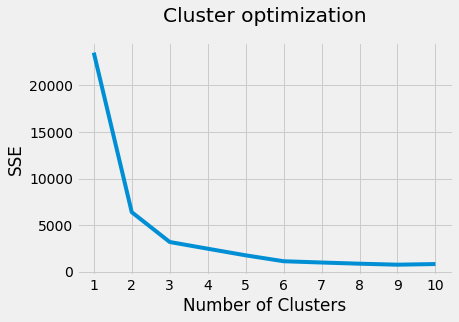

In [152]:
# kmeans cluster optimization
from sklearn.cluster import KMeans,MiniBatchKMeans
from warnings import filterwarnings
filterwarnings('ignore')

kmeans_features = {
     
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}


# Optimise Kmeans
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_features)
     kmeans.fit(userId_preferences.iloc[:,1:].values.reshape(-1,1))
     sse.append(kmeans.inertia_)
        
        
        
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Cluster optimization",pad=20)
plt.show()



<font color='red'>**Explain :we should check 2,3 groups performance (error is converge)**</font>

* **Evaluate cluster performance**

* Evaluate by Silhouette Analysis:
  * Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:
  * Compute the average distance from all data points in the same cluster (ai).
  * Compute the average distance from all data points in the closest cluster (bi).
  * Compute the coefficient:
    * The coefficient can take values in the interval [-1, 1].
    * If it is 0 –> the sample is very close to the neighboring clusters.
    * It it is 1 –> the sample is far away from the neighboring clusters.
    * It it is -1 –> the sample is assigned to the wrong clusters.

* **silhouette_score, explain :** <br>
    * The coefficient can take values in the interval [-1, 1]. <br>
    * If it is 0 –> the sample is very close to the neighboring clusters. <br>
    * It it is 1 –> the sample is far away from the neighboring clusters. <br>
    * It it is -1 –> the sample is assigned to the wrong clusters. <br>

* **Evaluate clusters = 2**

In [230]:
cluster = KMeans(n_clusters=2)
labels =cluster.fit_predict(userId_preferences.iloc[:,1:]).ravel()

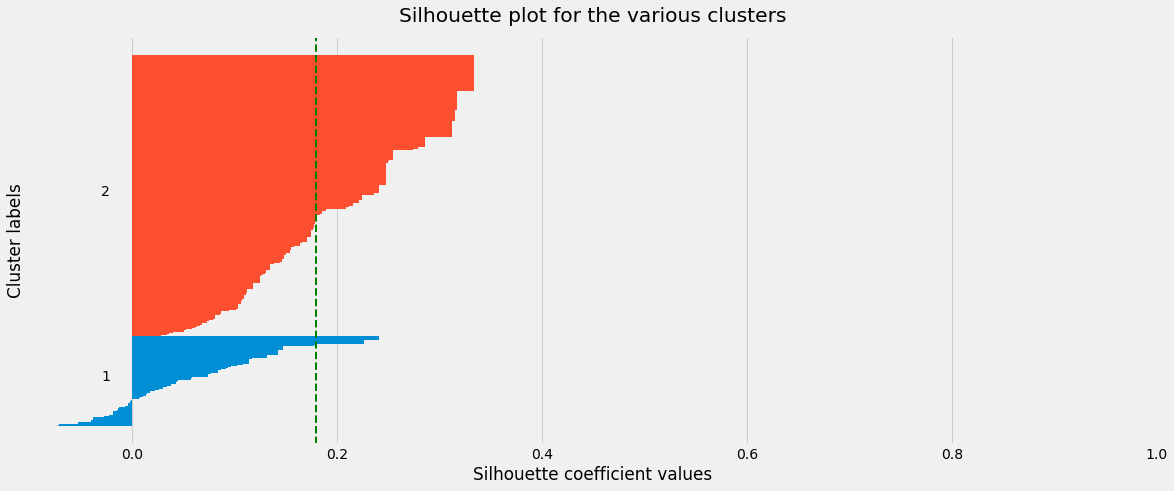

In [231]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


for i, k in enumerate([1]):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)    
    
    
    centroids = cluster.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(userId_preferences.iloc[:,1:], labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various 2 clusters', y=1.02);
    

In [232]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(userId_preferences.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

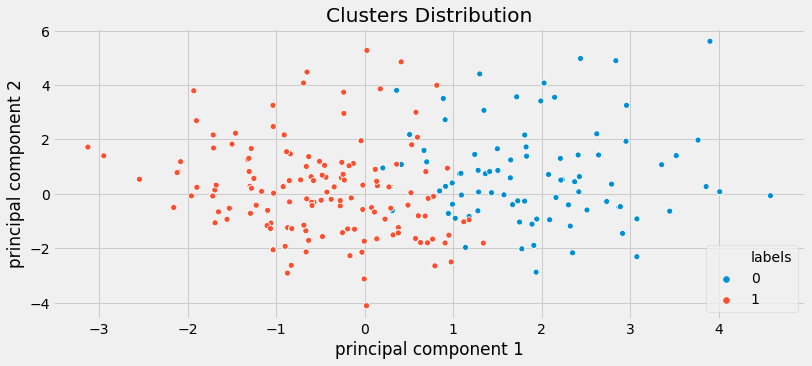

In [233]:
import seaborn as sns 
import matplotlib.pyplot as plt

#concat pca and labels
temp = pd.concat([pd.DataFrame(labels,columns=['labels']),principalDf],axis=1)

plt.figure(figsize=(12,5));
sns.scatterplot('principal component 1','principal component 2', data=temp, hue="labels").set_title('2 Clusters Distribution');
plt.legend( loc='lower right');

* **Evaluate clusters = 3**

In [234]:
cluster = KMeans(n_clusters=3)
labels =cluster.fit_predict(userId_preferences.iloc[:,1:]).ravel()

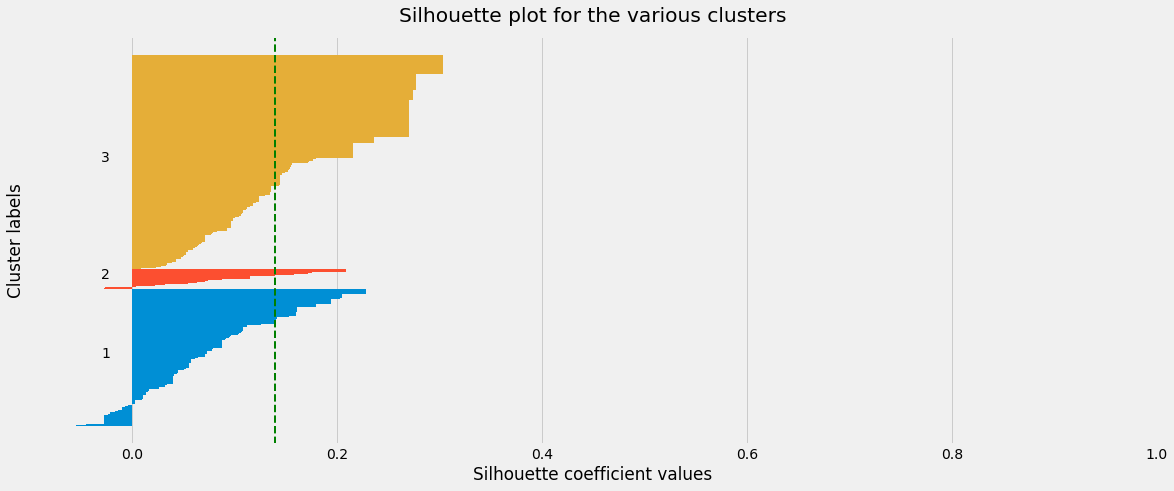

In [235]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


for i, k in enumerate([1]):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)    
    
    
    centroids = cluster.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(userId_preferences.iloc[:,1:], labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various 3 clusters', y=1.02);
    

In [236]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(userId_preferences.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

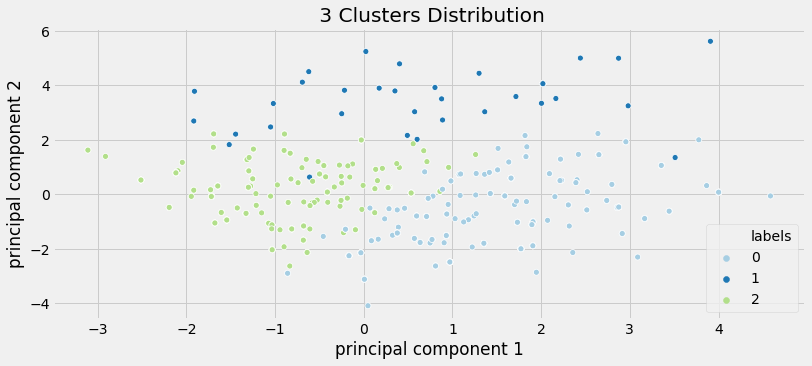

In [242]:
import seaborn as sns 
import matplotlib.pyplot as plt

#concat pca and labels
temp = pd.concat([pd.DataFrame(labels,columns=['labels']),principalDf],axis=1)


plt.figure(figsize=(12,5));
sns.scatterplot('principal component 1','principal component 2', data=temp, hue="labels",palette="Paired").set_title(' 3 Clusters Distribution');
plt.legend( loc='lower right');

</b>

<div class="alert alert-block alert-danger">

<b>

silhouette_score evaluation is 0.2 (far from 1). <br>
In addition we can see clusters are not arranged wisely.
2 groups are show best results, therefore we will use 2 groups

In real world we not good to go and need to find other metrics.

For this case study I am going forward.

</div>


In [266]:
# 2 group selection
cluster = KMeans(n_clusters=2)
labels =cluster.fit_predict(userId_preferences.iloc[:,1:]).ravel()



<font color='blue'>**Create userId group**</font>

In [267]:
userId_group = pd.concat([userId_preferences['userId'],
                               pd.DataFrame(labels,columns=['labels'])
                              ],axis=1)

display(userId_group.shape)
display(userId_group.head())

(1176, 2)

,userId,labels
0,681,0
1,738,0
2,1203,1
3,1284,0
4,1313,1



<font color='blue'>**creat Movies per group**</font>

In [268]:
userId_group['userId'] = userId_group['userId'].astype('str')
df['userId'] = df['userId'].astype('str')

headers =['timestamp', 'userId', 'title', 'user_rating'
         ,'population_rating','%total_votes'
         ,'%total_genres', 'total_score'
         ]

movies_per_group = df[headers].merge(userId_group,how='left',on='userId').rename(columns={'labels':'group'})

display(movies_per_group.shape)
display(movies_per_group.head())

(1185, 9)

,timestamp,userId,title,user_rating,population_rating,%total_votes,%total_genres,total_score,group
0,1485640873,37260,Take Out,3.5,3.500000,0.000843,0.238276,35.248632,1
1,1002920206,162287,"Faster, Pussycat! Kill! Kill!",2.0,2.000000,0.000843,0.147655,19.034023,0
2,1183509272,170726,Enough,3.0,3.000000,0.000843,0.333967,36.933936,1
3,1053917442,247770,Flashdance,4.5,4.500000,0.002530,0.325095,51.989849,1
4,940219934,161794,Say Anything...,4.0,4.285714,0.005902,0.429024,65.144398,1


* **remove duplicates**

In [274]:
movies_per_group.drop_duplicates(inplace=True)

In [275]:
movies_per_group = movies_per_group[['group','title','total_score','population_rating','%total_votes','%total_genres']]
print("")
display(movies_per_group.groupby('group').size())
print("")
display(movies_per_group.shape)
display(movies_per_group.head())

group
0    166
1    484
dtype: int64

(650, 6)

,group,title,total_score,population_rating,%total_votes,%total_genres
128,1,The Million Dollar Hotel,81.378381,4.500000,0.013491,0.333967
243,1,Sleepless in Seattle,68.490959,4.437500,0.006745,0.429024
206,1,Scarface,66.730906,5.000000,0.003373,0.481622
4,1,Say Anything...,65.144398,4.285714,0.005902,0.429024
814,1,48 Hrs.,64.938272,4.166667,0.002530,0.598859


* **sort movies_per_group table by group number and total score top to bottom**

In [276]:
movies_per_group = movies_per_group.sort_values(by=['group','total_score'],ascending=[False,False])

* **show top 10 movies per each category**

In [277]:
movies_per_group.loc[movies_per_group['group']==1,:].head(10)

,group,title,total_score,population_rating,%total_votes,%total_genres
128,1,The Million Dollar Hotel,81.378381,4.500000,0.013491,0.333967
243,1,Sleepless in Seattle,68.490959,4.437500,0.006745,0.429024
206,1,Scarface,66.730906,5.000000,0.003373,0.481622
4,1,Say Anything...,65.144398,4.285714,0.005902,0.429024
814,1,48 Hrs.,64.938272,4.166667,0.002530,0.598859
1097,1,To Catch a Thief,62.134190,5.000000,0.000843,0.518378
741,1,Killing Zoe,60.434610,4.750000,0.001686,0.481622
257,1,The Talented Mr. Ripley,60.346578,4.750000,0.003373,0.401141
282,1,The Killing,60.064240,5.000000,0.000843,0.481622
774,1,Payback,60.064240,5.000000,0.000843,0.481622


In [278]:
movies_per_group.loc[movies_per_group['group']==0,:].head(10)

,group,title,total_score,population_rating,%total_votes,%total_genres
259,0,Terminator 3: Rise of the Machines,69.779183,4.285714,0.011804,0.235108
80,0,Solaris,68.016584,4.444444,0.007589,0.380228
830,0,Righteous Ties,58.065667,5.000000,0.000843,0.446134
650,0,Space Jam,56.138473,5.000000,0.000843,0.411914
43,0,Back to the Future Part II,53.939845,3.812500,0.006745,0.252852
83,0,The Count of Monte-Cristo,53.586327,4.500000,0.001686,0.392902
23,0,The 39 Steps,52.732175,4.800000,0.004216,0.219899
366,0,Alexander,52.478388,4.000000,0.000843,0.478454
689,0,Blood: The Last Vampire,52.462527,5.000000,0.000843,0.346641
181,0,The Prisoner of Zenda,51.169799,4.300000,0.004216,0.257921




<font color='blue'>**Fit movies per userId**</font>

* **Filter movies already have watched by each user**

In [310]:
movies_already_watched = df[['userId','title']].drop_duplicates()
display(movies_already_watched.groupby(['userId']).size().sort_values(ascending=False))

userId
226446    2
194690    2
43572     2
87420     2
213232    2
         ..
265910    1
266067    1
266078    1
266590    1
100003    1
Length: 1176, dtype: int64

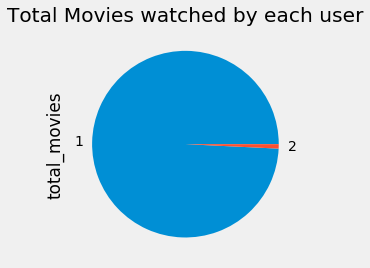

In [329]:
temp = movies_already_watched.groupby(['userId']).size().sort_values(ascending=False).reset_index().rename(columns={0:'total_movies'})
ax= temp['total_movies'].value_counts().plot(kind='pie');
ax.set_title('Total Movies watched by each user');

In [327]:
temp['total_movies'].value_counts()

1    1167
2       9
Name: total_movies, dtype: int64




<font color='red'>**Explain: we can see only 9 users watched 2 movies, most of users watched 1 movie**</font>





<font color='blue'>**Recommender per each userId on new 10 movies**</font>

In [333]:
movies_already_watched.loc[movies_already_watched['userId']=='226446',:]

,userId,title
36,226446,Taxi 4
498,226446,"The Adventures of Priscilla, Queen of the Desert"


In [336]:
userId_group.loc[userId_group['userId']=='226446',:]

,userId,labels
1004,226446,1


In [340]:
movies_per_group.head(2)

,group,title,total_score,population_rating,%total_votes,%total_genres
128,1,The Million Dollar Hotel,81.378381,4.5000,0.013491,0.333967
243,1,Sleepless in Seattle,68.490959,4.4375,0.006745,0.429024


In [413]:
'''
      Recommender system
    #######################
    
    input:
    ======
    
    cond1 - movies per group top to bottom
    cond2 - filter the movies have already seen by each userId 

    output:
    =======
    
    list top 10 movies customized per userId

'''

recommender_table = pd.DataFrame({'userId':[],'group':[],'title':[],'total_score':[]})


for user in userId_group['userId']:
    
    
    cond1 = movies_per_group['group'].isin(userId_group.loc[userId_group['userId']== user,'labels'])
    cond2 = ~movies_per_group['title'].isin(movies_already_watched.loc[movies_already_watched['userId']== user,'title'])
    
    temp = movies_per_group.loc[cond1 & cond2,['group','title','total_score']].head(10).reset_index(drop=True)
    
    user_10duplicted = pd.DataFrame([user for i in range(0,10)],columns=['userId'])
    temp = pd.concat([user_10duplicted,temp],axis=1)

    recommender_table = recommender_table.append(temp,ignore_index=True)
                            

In [414]:
recommender_table.head()

,userId,group,title,total_score
0,681,0.0,Terminator 3: Rise of the Machines,69.779183
1,681,0.0,Solaris,68.016584
2,681,0.0,Righteous Ties,58.065667
3,681,0.0,Space Jam,56.138473
4,681,0.0,Back to the Future Part II,53.939845


* **Evaluate recommender system**

UserId = 681

In [418]:
movies_already_watched.loc[movies_already_watched['userId']=='681',:]

,userId,title
966,681,Judgment Night


In [419]:
movies_per_group.loc[movies_per_group['title']=='Judgment Night',:]

,group,title,total_score,population_rating,%total_votes,%total_genres
146,0,Judgment Night,45.371163,3.875,0.003373,0.250317


In [417]:
recommender_table.loc[recommender_table['userId']=='681',:]

,userId,group,title,total_score
0,681,0.0,Terminator 3: Rise of the Machines,69.779183
1,681,0.0,Solaris,68.016584
2,681,0.0,Righteous Ties,58.065667
3,681,0.0,Space Jam,56.138473
4,681,0.0,Back to the Future Part II,53.939845
5,681,0.0,The Count of Monte-Cristo,53.586327
6,681,0.0,The 39 Steps,52.732175
7,681,0.0,Alexander,52.478388
8,681,0.0,Blood: The Last Vampire,52.462527
9,681,0.0,The Prisoner of Zenda,51.169799


<font color='red'>
<b>
Explain : <br>
* the system recognize user group and movies the movies already watched.<br>
* provide the best movies for him from the same group of movies.<br>
</font>
</b>

<div class="alert alert-block alert-success">
<b>
* Explain : <br>
* The system recognize user group and movies the movies already watched. <br>
* Provide the best movies for him from the same group of movies <br>  
* The system is working pretty well


</b>

<div class="alert alert-block alert-info">
<b> Questions 4: Comparing static model with recommender model   </b>
</div>






<font color='blue'>**A. How would you compare between the models**</font>

We can evaluate results by 2 statistic methods: <br>

**metrics** <br>
1.Non parametric test -  chi square (Goodness of fit). <br>
  In this method we count frequencies. <br>
  Distribution not relevant (example : 'samplig data' section) 
2.Parametric test - F test. <br>
  In this case we assume Central Limit Theorem, meanin rating as normal distribution. <br> 
  we calculate mean, std per each group.<br>
  H0: group similar<br>
  H1: group different<br>
  
for those to metrics we will calculate p value and choose confidence level.<br>
    
**steps:** <br>
metric : F-Test <br>

1. collect data: <br>
   * select 3 usersId <br>
   * show them 10 movies selected by static ordered table - collect there ratings mean,std <br>
   * show them 10 movies selected by recommender system - collect there ratings mean,std  <br>
2. compare there results <br>
3. compare results to confidence level <br>







<font color='blue'>**B. What is the pros and cons of using each model? (Think of the investment the company)**</font>

* **Static table model:**
   * pros:
     * Can learn from small dataset.
     * Faster to implement.
     * Easy to maintenance
   * cons: 
     * less accurate. <br>
       meaning the top 10 movies recommended to customer maybe not fit to his needs)
       
       
* **Recommender systeml:**
   * pros:
     * more accurate 
     * the customer will be more happy from company service
     
   * cons:
     * Can learn from Big dataset.
     * Time consuming for train.
     * High infrastructure cost for train porcees - storage, GPU resources, RAM memory <br>
    
     









<font color='blue'>**C. What are the limitations with evaluating these models prior to launch**</font>

* static table - depends on population and not specific userId
* recommender system - this is unsupervised learning meaning we can estimate results before launching only after. <br>
  after model has deployed we can create A/B test to check is rating average before model and after model.









<font color='blue'>**D. KPI Monitor methods**</font>

**Monitor UserId activity (for customer retention department):** <br>
1. Aggregate rating per userId every month- average and std. <br>
2. create confidence interval per user 95% which contain is average and std. <br>
3. compare each month userId  average rating and compare it to his confidence interval. <br>
4. create a table that contain all userId there rated change significantly (beyond confidence level). <br>
                                                                            
**Monitor movieId Activity (for Marketing department):** <br>                                                                           
1. Aggregate rating per movieId every month- average and std. <br>
2. create confidence interval per movieId 95% which contain is average and std. <br>
3. compare each month movieId  average rating and compare it to his confidence interval. <br>
4. create a table that contain all movieId there rated change significantly (beyond confidence level). <br>                                                                           

**Monitor recommender System performance (for Marketing department):** <br>
1. Aggregate rating per All movies every month- average and std. <br>
2. create confidence interval All movies 95% which contain is average and std. <br>
3. compare each month All movies  aggregated  average rating and compare it to confidence interval. <br>
4. when results are beyond confidence interval. recommender system not do good job anymore

**real time Alerts on new features not take into account and system should consider them  as well (for R&D)**